In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# EDA

### Load Data

In [11]:
df=pd.read_csv('car_data.csv')

In [18]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


### Statistical Analysis


In [13]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.000000,550.000000,548.000000,548.000000,550.000000,550.000000
mean,21.460000,24.069091,5.315693,2.931752,28.609091,2019.000000
std,8.147392,7.478369,1.759999,1.248419,6.832228,3.165156
min,11.000000,14.000000,3.000000,1.200000,18.000000,2014.000000
25%,17.000000,20.000000,4.000000,2.000000,24.000000,2016.000000
50%,20.000000,23.000000,4.000000,2.500000,28.000000,2019.000000
75%,24.000000,27.000000,6.000000,3.500000,32.000000,2022.000000
max,126.000000,112.000000,12.000000,6.800000,102.000000,2024.000000


In [14]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [15]:
imputer = SimpleImputer(strategy='mean')
df[['cylinders', 'displacement']] = imputer.fit_transform(df[['cylinders', 'displacement']])

Apply One-Hot Encoding to categorical columns

In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)

Calculate the correlation matrix for the encoded datase

In [17]:
correlation_matrix_encoded = df_encoded.corr()
correlation_matrix_encoded

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year,class_large car,class_midsize car,class_midsize station wagon,class_minicompact car,...,model_xj,model_xjl,model_xt5,model_xt5 awd,model_yukon c1500 2wd,model_yukon c1500 xl 2wd,model_yukon k1500 4wd,model_yukon k1500 xl 4wd,model_z4 sdrive28i,transmission_m
city_mpg,1.000000,0.991671,-0.472787,-0.482001,0.944696,0.100795,-0.077899,0.051941,-0.014546,0.079655,...,-0.033871,-0.033871,-0.012898,-0.018141,-0.044233,-0.044233,-0.047944,-0.051655,0.002831,0.026095
combination_mpg,0.991671,1.000000,-0.527739,-0.537082,0.974735,0.105272,-0.079931,0.072849,-0.012687,0.099745,...,-0.034668,-0.034668,-0.011819,-0.017531,-0.053115,-0.053115,-0.057158,-0.057158,0.011030,0.057285
cylinders,-0.472787,-0.527739,1.000000,0.940534,-0.551933,-0.203614,0.142488,-0.044694,-0.010866,-0.111514,...,0.065271,0.065271,0.016639,0.016639,0.092392,0.092392,0.092392,0.092392,-0.031992,-0.156855
displacement,-0.482001,-0.537082,0.940534,1.000000,-0.560472,-0.239384,0.141191,-0.037527,-0.020950,-0.123963,...,0.070900,0.070900,0.022908,0.022908,0.136751,0.136751,0.136751,0.136751,-0.031940,-0.144566
highway_mpg,0.944696,0.974735,-0.551933,-0.560472,1.000000,0.118513,-0.071745,0.112576,-0.018666,0.142064,...,-0.035070,-0.035070,-0.010061,-0.016313,-0.058492,-0.058492,-0.062918,-0.067343,0.021201,0.117156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
model_yukon c1500 xl 2wd,-0.044233,-0.053115,0.092392,0.136751,-0.058492,-0.076416,-0.009400,-0.019728,-0.003650,-0.012037,...,-0.002578,-0.002578,-0.002578,-0.002578,-0.003650,1.000000,-0.003650,-0.003650,-0.002578,-0.025469
model_yukon k1500 4wd,-0.047944,-0.057158,0.092392,0.136751,-0.062918,-0.076416,-0.009400,-0.019728,-0.003650,-0.012037,...,-0.002578,-0.002578,-0.002578,-0.002578,-0.003650,-0.003650,1.000000,-0.003650,-0.002578,-0.025469
model_yukon k1500 xl 4wd,-0.051655,-0.057158,0.092392,0.136751,-0.067343,-0.076416,-0.009400,-0.019728,-0.003650,-0.012037,...,-0.002578,-0.002578,-0.002578,-0.002578,-0.003650,-0.003650,-0.003650,1.000000,-0.002578,-0.025469
model_z4 sdrive28i,0.002831,0.011030,-0.031992,-0.031940,0.021201,-0.040489,-0.006640,-0.013937,-0.002578,-0.008503,...,-0.001821,-0.001821,-0.001821,-0.001821,-0.002578,-0.002578,-0.002578,-0.002578,1.000000,-0.017993


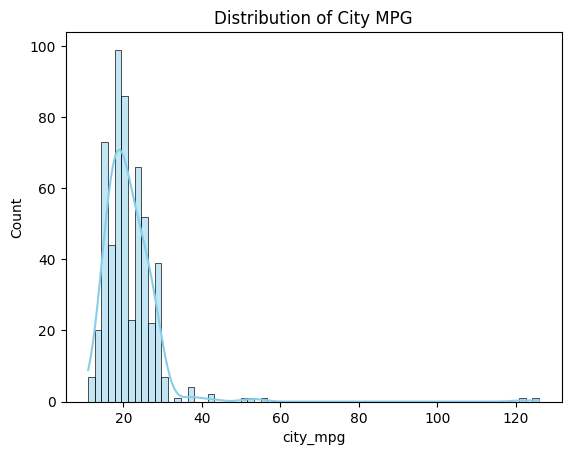

In [19]:
# Distribution plot for city_mpg
sns.histplot(df['city_mpg'], kde=True,color='skyblue')
plt.title('Distribution of City MPG')
plt.show()

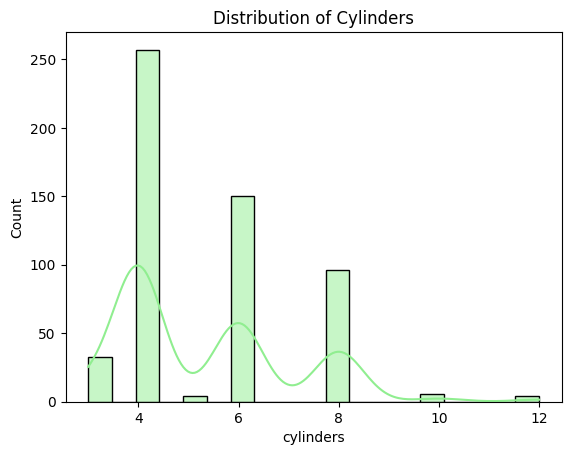

In [20]:
# Distribution plot for cylinders
sns.histplot(df['cylinders'], kde=True, color='lightgreen')
plt.title('Distribution of Cylinders')
plt.show()

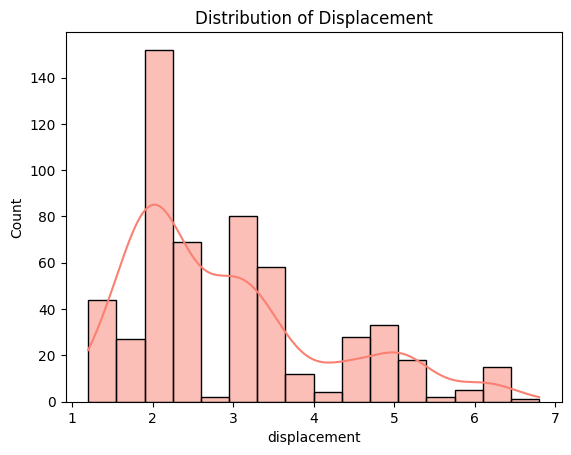

In [21]:
# Distribution plot for displacement
sns.histplot(df['displacement'], kde=True, color='salmon')
plt.title('Distribution of Displacement')
plt.show()

# Predicting Fuel Efficiency

In [22]:
X = df_encoded.drop('city_mpg', axis=1)
y = df_encoded['city_mpg']

Split the data into training and testing sets (80% training, 20% testing)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict and evaluate (rf_model)

In [27]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}")

Random Forest Accuracy: 56.36


Gradient Boost

In [28]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Predict and evaluate (gb_model)

In [29]:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb*100:.2f}')

Accuracy: 60.91


CatBoost

In [30]:
cat_model = CatBoostClassifier(random_seed=42, verbose=0)
cat_model.fit(X_train, y_train)

Predict and evaluate (cat_model)

In [31]:
y_pred_cat = cat_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f'Accuracy: {accuracy_cat*100:.2f}')

Accuracy: 58.18


Conclusion
Our analysis of car efficiency predictions, specifically focusing on city miles per gallon (city_mpg), yielded insightful results when comparing three advanced machine learning models: Random Forest, Gradient Boosting, and CatBoost.

Model Performance
The accuracy metrics obtained are as follows:

Random Forest: 56.36%
Gradient Boosting: 60.91% (highest accuracy)
CatBoost: 58.18%
These results indicate that Gradient Boosting is the most effective model for predicting city_mpg in our dataset. Its superior performance can be attributed to its ability to capture complex relationships within the data.

Feature Scaling
It is noteworthy that we applied feature scaling using StandardScaler to enhance model performance. This normalization of input features ensured a more effective learning process across all models.

Comparative Analysis
The comparative analysis demonstrates that while all three models provide valuable insights, the superior accuracy of Gradient Boosting makes it the preferred choice for stakeholders seeking reliable predictions of vehicle fuel efficiency in urban settings.

Future Work¶
To further enhance the models' performance, future work could explore:

Hyperparameter tuning
Additional feature engineering
These steps could yield even more accurate predictions and valuable insights into car efficiency.